### **Настройка окружение**

Установка необходимых пакетов

In [ ]:
!apt-get install git
!git clone https://github.com/narumiruna/efficientnet-pytorch.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Cloning into 'efficientnet-pytorch'...
remote: Enumerating objects: 681, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 681 (delta 55), reused 64 (delta 46), pack-reused 572
Receiving objects: 100% (681/681), 185.83 KiB | 2.65 MiB/s, done.
Resolving deltas: 100% (366/366), done.


In [ ]:
!pip install mlconfig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=7e11452a1e2599ebf39b9b65e0c51b14dc2d34c4a501b47fe8e658d6ea5e2e06
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


Монтирование Google Drive к текущему окружению:

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Импорт необходимых зависимостей

In [ ]:
import cv2
import os
import requests
import tarfile
from google.colab import drive
from six.moves import cPickle
import imageio
import matplotlib.pyplot as plt
import random
from PIL import Image
import zipfile
import shutil
import os
import imghdr
import shutil
import math
import sys
import urllib
import torch
from torchvision import transforms
from efficientnet_pytorch.efficientnet.models.efficientnet import EfficientNet, params
from torch import nn
from collections import OrderedDict
import numpy as np

---
### **Подготовка датасета**

Класс **Dataset** - предназначен для работы с наборами данных.

In [ ]:
class Dataset:

    def __init__(self, path_to_imgs):
        if not os.path.exists(path_to_imgs):
            raise FileNotFoundError(f"The {path_to_img} directory does not exist.")
        else:
            self.path_to_imgs = path_to_imgs

    def imgs_nums(self):
        img_num = len([name for name in os.listdir(self.path_to_imgs) if os.path.isfile(os.path.join(self.path_to_imgs, name))])
        return img_num

    def view_random_image(self):
        image_files = [f for f in os.listdir(self.path_to_imgs) if os.path.isfile(os.path.join(self.path_to_imgs, f))]
        random_image_file = random.choice(image_files)
        random_image_path = os.path.join(self.path_to_imgs, random_image_file)
        img = Image.open(random_image_path)
        img_size = img.size
        print(f"Name of image: {random_image_file}")
        print(f"Size of image: {img_size}")
        plt.imshow(img)
        plt.show()

    def showAllImgsWithType(self, type):
        for filename in os.listdir(self.path_to_imgs):
            abs_filename = os.path.join(self.path_to_imgs, filename)
            if os.path.isfile(abs_filename) and filename.lower().endswith(f'.{type}'):
                print(abs_filename)

    def convertToJpg(self):
        input_folder = self.path_to_imgs
        for filename in os.listdir(input_folder):
            input_path = os.path.join(input_folder, filename)
            img_format = imghdr.what(input_path)
            if not img_format:
                print(f"Skipping {filename}: The file format is not supported")
                continue
            output_path = os.path.join(input_folder, os.path.splitext(filename)[0] + ".jpg")
            img = Image.open(input_path)
            img.save(output_path, "JPEG")
            os.remove(input_path)
            print(f"The conversion of {filename} is completed")

    def resizeAllImagesInDir(self):
        for filename in os.listdir(self.path_to_imgs):
            abs_filename = os.path.join(self.path_to_imgs, filename)
            if os.path.isfile(abs_filename):
                img = cv2.imread(abs_filename)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    cv2.imwrite(abs_filename, img)
                else:
                    os.remove(abs_filename)

Класс **Img** - предназначен для работы с изображением

In [ ]:
class Img:

    def __init__(self, path_to_imgs):
        if not os.path.exists(path_to_imgs):
            raise FileNotFoundError(f"Image on {path_to_imgs} doesn't exist.")
        else:
            self.path_to_imgs = path_to_imgs

    def get_img_and_size(self):
        img = cv2.imread(self.path_to_imgs)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print(img.shape)
        plt.imshow(img)
        plt.show()

#### Разархивирование архива

In [ ]:
zip_file_path = '/from' # path to archive
extract_folder = '/to'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(os.listdir(extract_folder))

Размер загруженного датасета

In [ ]:
hourses_dataset = Dataset("/") # path to dataset
print(hourses_dataset.imgs_nums())
zebras_dataset = Dataset("/")
print(zebras_dataset.imgs_nums())

Имя изображения: horse (15).jpg
Размер изображения: (224, 224)


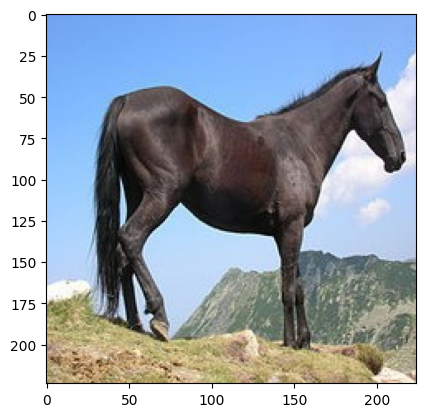

Имя изображения: n02391049_1172.jpg
Размер изображения: (256, 256)


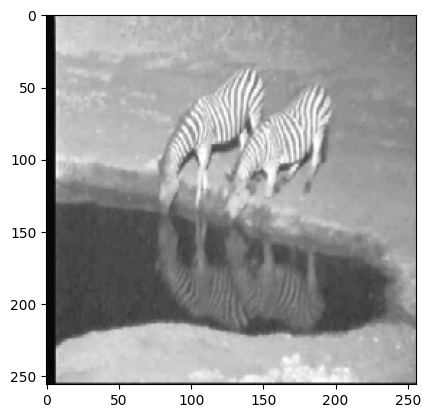

In [ ]:
hourses_dataset.view_random_image()
zebras_dataset.view_random_image()

#### Убираем все файлы с расширение отличные от jpg

Найти все файлы с расширением **png**

In [ ]:
horse_dataset = Dataset("/")
zebra_dataset = Dataset("/")

In [ ]:
horse_dataset.showAllImgsWithType('/', "png")
zebra_dataset.showAllImgsWithType('/', "png")

Преобразовать их в **jpg**

In [ ]:
horse_dataset.convertToJpg('/')
zebra_dataset.convertToJpg('/')

#### Сжатие изображение

Мы предпологаем что все изображение одного размера - (224, 224)

In [ ]:
Dataset('/').resizeAllImagesInDir()

---
### **Работа с директориями**

#### Перенос набора данных

In [ ]:
def move_files_by_percentage(source_folder, destination_folder, sizeofds, percentage):

    if not os.path.exists(source_folder):
            raise FileNotFoundError(f"The {source_folder} directory does not exist.")

    if not os.path.exists(destination_folder):
            raise FileNotFoundError(f"The {destination_folder} directory does not exist.")

    files = os.listdir(source_folder)

    jpg_files = [file for file in files if file.lower().endswith('.jpg')]

    jpg_files.sort()

    total_jpg_files = len(jpg_files)
    print(f'Number of files {total_jpg_files}')

    if total_jpg_files != sizeofds: #validation
        print(f'{total_jpg_files} and {sizeofds}')
        raise ValueError("Something went wrong")

    files_to_move_count = math.ceil(total_jpg_files * percentage / 100)

    jpg_files_to_move = jpg_files[:files_to_move_count]

    for file_name in jpg_files_to_move:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.move(source_path, destination_path)

    print(f'Moved {len(jpg_files_to_move)} JPG files from {source_folder} to {destination_folder}.')

*Класс 1*

In [ ]:
hoursedataset = Dataset('/')

# Full move - 100 %
move_files_by_percentage('/from', '/to', hoursedataset.imgs_nums(), 100)

In [ ]:
movedhoursedataset = Dataset('/')

# Move 10 %
move_files_by_percentage('/from','/to', movedhoursedataset.imgs_nums(), 10)

In [ ]:
print(movedhoursedataset.imgs_nums())
print(Dataset("/").imgs_nums())

*Класс 2*

In [ ]:
zebrasdataset = Dataset('/')

# Full move
move_files_by_percentage('/from', '/to', zebrasdataset.imgs_nums(), 100)

In [ ]:
movedzebrasdataset = Dataset('/')

# Move 10 %
move_files_by_percentage('/from', '/from', movedzebrasdataset.imgs_nums(), 10)

In [ ]:
print(movedzebrasdataset.imgs_nums())
print(Dataset("/").imgs_nums())

---
### **Обучение модели**

In [ ]:
!python efficientnet-pytorch/train.py -c efficientnet-pytorch/configs/imagenet.yaml --data-parallel

Выходные данные были обрезаны до нескольких последних строк (5000).
Train:  88% 43/49 [00:27<00:02,  2.26it/s, train loss: 0.6906, train acc: 78.49%.]
Train:  88% 43/49 [00:28<00:02,  2.26it/s, train loss: 0.6857, train acc: 78.44%.]
Train:  90% 44/49 [00:28<00:02,  2.26it/s, train loss: 0.6857, train acc: 78.44%.]
Train:  90% 44/49 [00:28<00:02,  2.26it/s, train loss: 0.6800, train acc: 78.65%.]
Train:  92% 45/49 [00:28<00:01,  2.27it/s, train loss: 0.6800, train acc: 78.65%.]
Train:  92% 45/49 [00:28<00:01,  2.27it/s, train loss: 0.6757, train acc: 78.63%.]
Train:  94% 46/49 [00:28<00:01,  2.27it/s, train loss: 0.6757, train acc: 78.63%.]
Train:  94% 46/49 [00:29<00:01,  2.27it/s, train loss: 0.6784, train acc: 78.46%.]
Train:  96% 47/49 [00:29<00:00,  2.28it/s, train loss: 0.6784, train acc: 78.46%.]
Train:  96% 47/49 [00:29<00:00,  2.28it/s, train loss: 0.6742, train acc: 78.42%.]
Train:  98% 48/49 [00:29<00:00,  2.30it/s, train loss: 0.6742, train acc: 78.42%.]
Train:  98% 48/49 [

---
### **Recognition**

#### Проверка коррекности работы модели на отдельной картинки

In [ ]:
def load_and_predict_on_img(image_path, checkpoint_path='/'): # file path with weights

    model = EfficientNet(1.0, 1.0, 0.2)
    model.classifier = nn.Sequential(nn.Dropout(0.2), nn.Linear(1280, 2), nn.Softmax(dim=1))

    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    state_dict = checkpoint['model']
    model_dict = model.state_dict()
    new_state_dict = OrderedDict()

    matched_layers, discarded_layers = [], []
    for k, v in state_dict.items():
        if k.startswith('module.'):
            k = k[7:]

        if k in model_dict and model_dict[k].size() == v.size():
            new_state_dict[k] = v
            matched_layers.append(k)
        else:
            discarded_layers.append(k)

    model_dict.update(new_state_dict)
    model.load_state_dict(model_dict)

    tfms = transforms.Compose([transforms.Resize(224),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    img = tfms(Image.open(image_path)).unsqueeze(0)

    model.eval()
    with torch.no_grad():
        res = model(img)

    class_names = ['0Class', '1Class']
    predicted_class = torch.argmax(res)
    predicted_probability = torch.max(res).item()

    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Probability: {predicted_probability*100:.2f}%")
    print(res)

In [ ]:
load_and_predict_on_img('/')

Предсказанный класс: зебра
Вероятность: 99.98%
tensor([[1.5829e-04, 9.9984e-01]])


In [ ]:
load_and_predict_on_img('/')

Предсказанный класс: зебра
Вероятность: 100.00%
tensor([[6.7642e-06, 9.9999e-01]])


---
#### **Object recognition**

In [ ]:
def load_and_predict(image_path, model):
    tfms = transforms.Compose([transforms.Resize(224),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    img = tfms(Image.open(image_path)).unsqueeze(0)

    model.eval()
    with torch.no_grad():
        res = model(img)

    class_names = ['0Class', '1Class']
    predicted_class = torch.argmax(res)
    predicted_probability = torch.max(res).item()

    return class_names[predicted_class], predicted_probability

In [ ]:
def makeRecognition(input_video, output_video):

    base_path = "/"
    video_path = os.path.join(base_path, 'input_video/', input_video)
    output_path = os.path.join(base_path, 'output_video/', output_video)

    video = cv2.VideoCapture(video_path)

    if not video.isOpened():
        print('Error opening the video file:', video_path)
        sys.exit()

    model_path = '/.../horseszebras/bestweight.pth'
    model = EfficientNet(1.0, 1.0, 0.2)
    model.classifier = nn.Sequential(nn.Dropout(0.2), nn.Linear(1280, 2), nn.Softmax(dim=1))
    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    state_dict = checkpoint['model']
    model_dict = model.state_dict()
    new_state_dict = OrderedDict()

    for k, v in state_dict.items():
        if k.startswith('module.'):
            k = k[7:]

        if k in model_dict and model_dict[k].size() == v.size():
            new_state_dict[k] = v

    model_dict.update(new_state_dict)
    model.load_state_dict(model_dict)

    w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_video = cv2.VideoWriter(output_path, fourcc, 20.0, (w, h))

    ok, firstframe = video.read()

    if not ok:
        print('Error reading the first frame')
        sys.exit()

    gray_frame = cv2.cvtColor(firstframe, cv2.COLOR_BGR2GRAY)
    prev_frame = gray_frame

    while True:

        ok, frame = video.read()

        if not ok:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        diff = cv2.absdiff(gray_frame, prev_frame)

        _, binary_diff = cv2.threshold(diff, 24, 255, cv2.THRESH_BINARY)

        blurred_diff = cv2.blur(binary_diff, (25, 25))

        contours, _ = cv2.findContours(blurred_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        tmp_copy = frame.copy()

        common_mask = np.zeros_like(frame, dtype=np.uint8)

        for contour in contours:

            x_rect, y_rect, w_rect, h_rect = cv2.boundingRect(contour)

            is_nested = False
            for parent_contour in contours:
                if parent_contour is not contour:
                    x_parent, y_parent, w_parent, h_parent = cv2.boundingRect(parent_contour)
                    if x_rect >= x_parent and y_rect >= y_parent and x_rect + w_rect <= x_parent + w_parent and y_rect + h_rect <= y_parent + h_parent:
                        is_nested = True
                        break

            min_rect_size = 70
            if not is_nested and w_rect >= min_rect_size and h_rect >= min_rect_size:
                tmp_image_path = "/.jpg"
                cv2.imwrite(tmp_image_path, frame[y_rect:y_rect + h_rect, x_rect:x_rect + w_rect])

                predicted_class, predicted_probability = load_and_predict(tmp_image_path, model)

                rect_color = (0, 0, 255)
                rect_color = (0,252,0) if predicted_class == "0Class" else (255, 0, 0)

                cv2.rectangle(tmp_copy, (x_rect, y_rect), (x_rect + w_rect, y_rect + h_rect), rect_color, 2)

                rect_mask = np.zeros_like(frame, dtype=np.uint8)
                cv2.rectangle(rect_mask, (x_rect, y_rect), (x_rect + w_rect, y_rect + h_rect), (255, 255, 255), thickness=cv2.FILLED)

                common_mask = cv2.bitwise_or(common_mask, rect_mask)

                text = f"{predicted_class}: {predicted_probability*100:.2f}%"
                font_size = 0.7
                font_thickness = 1
                font_color = (255, 255, 255)
                text_position = (x_rect, y_rect - 10)
                cv2.putText(tmp_copy, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

        blurred_common_mask = cv2.GaussianBlur(common_mask, (51, 51), 0)

        tmp_copy = cv2.addWeighted(tmp_copy, 0.6, blurred_common_mask, 0.3, 0)

        output_video.write(tmp_copy)
        prev_frame = gray_frame

    video.release()
    output_video.release()
    print("Processing is completed. The video is saved in", output_path)

*Класс 1*

In [ ]:
makeRecognition('0Class/.mp4', '0Class/.avi')

*Класс 2*

In [ ]:
makeRecognition('1Class/.mp4', '1Class/.avi')